In [1]:
from IPython.display import Image

In [2]:
import pandas as pd
import numpy as np
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

# UCI 머신러닝 저장소의 Wine 데이터셋에 접근되지 않을 때
# 다음 코드의 주석을 제거하고 로컬 경로에서 데이터셋을 읽으세요:

# df_wine = pd.read_csv('wine.data', header=None)


df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

# 4.4 특성 스테일 맞추기
* 특성 스케일 조정이 필요없는 머신러닝 알고리즘 : 결정 트리, 랜덤 포레스트 등
* 그 외 모든 머신러닝 알고리즘에는 **특성 스케일 조정이 매우 중요**
* 특성 스케일 방법
    * 정규화(normalization)
    * 표준화(standardization)


정규화 : 특성 스케일을 [0, 1] 범위에 맞추는 것
* 최소-최대 스케일 변환(min-max scaling)

$x^{(i)}_{norm} = \dfrac{x^{(i)}-x_{min}}{x_{max}-x_{min}}$

정해진 범위의 값이 필요할 때 유용한 기법.

In [4]:
# 사이킷런의 최소-최대 스케일 변환
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

표준화 : 특성의 평균을 0에 맞추고 표준편차를 1로 만들어 정규 분포와 같은 특징으로 만듬
* 많은 머신러닝 알고리즘, 경사 하강법 같은 최적화 알고리즘에 많이 사용
* 이상치 정보가 유지되기 때문에 제한된 범위로 데이터를 조정하는 최소-최대 스케일 변환에 비해 알고리즘이 이상치에 덜 민감.

$x^{(i)}_{std} = \dfrac{x^{(i)}-\mu_x}{\sigma_x}$

$\mu_x$는 어떤 특성의 샘플 평균.

$\sigma_x$는 그에 해당하는 표준 편차

In [5]:
ex = np.array([0, 1, 2, 3, 4, 5])

print('표준화 :', (ex-ex.mean()) / ex.std())

print('정규와 :', (ex-ex.min()) / (ex.max()-ex.min()))

표준화 : [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
정규와 : [0.  0.2 0.4 0.6 0.8 1. ]


In [6]:
# 사이킷런의 표준화
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

* 특성 조정 방법 - RobustScaler
    * 이상치가 많이 포함된 작은 데이터셋을 다룰 때 특히 도움된다.
    * 특성 열마다 독립적으로 작용하며 중간값을 뺀 다음 데이터셋의 1사분위수와 3사분위수(즉, 25백준위수와 75백준위수)를 사용해서 데이터셋의 스케일을 조정.
    * 극단적인 값과 이상치에 영향을 덜 받는다.

$ x_{robust}^{(i)} = \dfrac{x^{(i)} - q_2}{q_3 - q_1}$

In [7]:
from sklearn.preprocessing import RobustScaler
rbs = RobustScaler()
X_train_robust = rbs.fit_transform(X_train)
X_test_robust = rbs.transform(X_test)

In [8]:
(ex  - np.percentile(ex, 50)) / (np.percentile(ex, 75) - np.percentile(ex, 25))

array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ])

* 특성 조정 방법 - MaxAbsScaler
    * 각 특성별로 데이터를 최대 절대값으로 나눈다. 따라서 각 특성의 최대값은 1이된다.
    * 전체 특성은 [-1, 1] 범위로 변경.

In [9]:
from sklearn.preprocessing import MaxAbsScaler
mas = MaxAbsScaler()
X_train_maxabs = mas.fit_transform(X_train)
X_test_maxabs = mas.transform(X_test)

In [10]:
ex / np.max(np.abs(ex))

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

`StandardScaler`, `MinMaxScaler`, `RobustScaler`, `MaxAbsScaler`에 대응하는 `scale()`, `minmax_scale()`, `robust_scale()`, `maxabs_scale()` 함수가 있습니다. 이 함수들은 1차원 배열도 입력 받을 수 있습니다.

In [11]:
from sklearn.preprocessing import scale, minmax_scale, robust_scale, maxabs_scale
print('StandardScaler:', scale(ex))
print('MinMaxScaler:', minmax_scale(ex))
print('RobustScaler:', robust_scale(ex))
print('MaxAbsScaler:', maxabs_scale(ex))

StandardScaler: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
MinMaxScaler: [0.  0.2 0.4 0.6 0.8 1. ]
RobustScaler: [-1.  -0.6 -0.2  0.2  0.6  1. ]
MaxAbsScaler: [0.  0.2 0.4 0.6 0.8 1. ]


`MaxAbsScaler`, `maxabs_scaler()`는 데이터를 중앙에 맞추지 않기 때문에 희소 행렬을 사용할 수 있다.

In [12]:
from scipy import sparse
X_train_sparse = sparse.csr_matrix(X_train)
X_train_maxabs = mas.fit_transform(X_train_sparse)

`RobustScaler`는 희소 행렬을 사용해 훈련할 수 없지만, 변환은 가능.

In [13]:
X_train_robust = rbs.transform(X_train_sparse)

`Normalizer`클래스와 `normalize()` 함수는 특성이 아닌 샘플별로 정규화를 수행. 또한 희소 행렬도 처리 가능. 기본적으로 샘플의 L2 규제가 1이 되도록 정규화한다.

In [14]:
from sklearn.preprocessing import Normalizer

nrm = Normalizer()
X_train_l2 = nrm.fit_transform(X_train)

Normalizer 클래스의 norm 매개변수에 사용할 규제를 지정할 수 있다. 

'l1', 'l2', 'max', default='l2'

In [15]:
ex_2f = np.vstack((ex[1:], ex[1:]**2))
ex_2f

array([[ 1,  2,  3,  4,  5],
       [ 1,  4,  9, 16, 25]])

L2 규제 공식

$ \lVert \boldsymbol{x} \rVert_2 = \sqrt{x_1^2 + x_2^2 + \cdots + x_n^2} $

먼저 샘플별로 특서으이 제곱을 더하기 위해 sum() 함수에서 axis=1을 사용. 이 값의 제곱근을 구하면 L2 규제다. 그리고 각 샘플의 특성을 해당 L2 규제로 나눈다.

In [16]:
l2_norm = np.sqrt(np.sum(ex_2f ** 2, axis=1))
print(l2_norm)

ex_2f / l2_norm.reshape(-1, 1)

[ 7.41619849 31.28897569]


array([[0.13483997, 0.26967994, 0.40451992, 0.53935989, 0.67419986],
       [0.03196014, 0.12784055, 0.28764125, 0.51136222, 0.79900347]])

L1 규제 공식

$ \lVert \boldsymbol{x} \rVert_1 = \lvert x_1 \rvert + \lvert x_2 \rvert + \cdots + \lvert x_n \rvert $

절대값인 L1 규제를 사용하여 각 샘플을 나눈다.


In [17]:
l1_norm = np.sum(np.abs(ex_2f), axis=1)
print(l1_norm)

ex_2f / l1_norm.reshape(-1, 1)

[15 55]


array([[0.06666667, 0.13333333, 0.2       , 0.26666667, 0.33333333],
       [0.01818182, 0.07272727, 0.16363636, 0.29090909, 0.45454545]])

# 4.5 유용한 특성 선택
모델이 테스트 데이터셋보다 훈련 데이터셋에서 성능이 훨씬 높다면 과대적합에 대한 강력한 신호이다.

* 일반화 오차 감소 방법 - 과대적합을 막는 방법
    1. 더 많은 훈련 데이터를 모은다.
    2. 규제를 통해 복잡도 제한
    3. 파라미터 개수가 적은 간단한 모델 선택
    4. 데이터 차원을 줄인다.

### 4.5.1 모델 복잡도 제한을 위한 L1 규제와 L2 규제

$L2: \lVert \boldsymbol w \rVert_2^2 = \sum_{j=1}^m w_j^2$

$L1: \lVert \boldsymbol w \rVert_1 = \sum_{j=1}^m \lvert w_j \rvert$

L2 규제와 대조적으로 L1 규제는 보통 희소한 특성 벡터를 만든다. 대부분의 특성 가중치가 0되어 관련 없는 특성이 많은 고차원 데이터셋일 경우 이런 희소성이 도움이 될 수 있다. 특히 훈련 샘플보다 관련 없는 특성이 더 많은 경우이다. 

### 4.5.2 L2 규제의 기하학적 해석
* L2 규제는 비용 함수에 페널티 항(penalty term)을 추가한다. 규제가 없는 비용 함수로 훈련한 모델에 비해 가중치 값을 아주 작게 만드는 효과를 낸다.

In [18]:
# 가중치 평면에 투영된 블록 비용 함수의 등고선
# 훈련 데이터에서 비용 함수를 최소화하는 가중치 값의 조합을 찾는 것.
Image(url='https://git.io/JtY8I', width=500) 

규제를 더 작은 가중치를 얻기 위해 비용 함수를 추가하는 페널티 항으로 생각할 수 있다. = 큰 가중치를 제한

규제 파라미터로 규제의 강도를 크게 하면 가중치가 0에 가까워지고 훈련 데이터에 대한 모델 의존성은 줄어든다.

In [19]:
# L2 규제와 비용함수
Image(url='https://git.io/JtY8L', width=500) 

2차식인 L2 규제 항은 회색 공으로 표현되어 있다. 가중치 값은 규제 예산을 초과할 수 없다. 즉, 가중치 값의 조합이 회색 공 바깥에 놓일 수 없다. 즉, 비용 함수를 최소화해야 하는데 페널티 제약이 있는 상황에서 최선은 L2 회색 공과 규제가 없는 비용 함수의 등고선이 만나는 지점이다.

규제 파라미터가 커질수록 페널티 비용이 빠르게 증가하며 L2 공을 작게 만든다.

=> **규제가 없는 비용과 페널티 항의 합을 최소화**

### 4.5.3 L1 규제를 사용한 희소성

In [20]:
# L1 규제와 비용 함수
Image(url='https://git.io/JtY8t', width=500) 

$w_{1}=0$일 때 비용 함수의 등고선이 L1 다이아몬드와 만나느 것을 볼 수 있다. L1 규제의 등고선은 날카롭기 때문에 비용 함수의 포물선과 L1 다이아몬드의 경계가 만나는 최적점은 축에 가깝게 위치할 가능성이 높다. 이것이 희소성을 나타내는 이유이다.

In [21]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(solver='liblinear', penalty='l1')

LogisticRegression(penalty='l1', solver='liblinear')

'lbfgs'는 L1 규제를 지원하지 않기 때문에 다른 알고리즘을 선택해야 한다(ex, liblinear).


In [22]:
lr = LogisticRegression(solver='liblinear', penalty='l1', C=1.0, random_state=1)
# C=1.0 이 기본.
# 규제 효과를 높이거나 낮추려면 C 값을 높이거나 낮춰야한다
# 규제 강도를 높이면 희소성 더 강하게 할 수 있다 - 0인 원소가 더 많아진다.
lr.fit(X_train_std, y_train)
print('훈련 정확도:', lr.score(X_train_std, y_train))
print('테스트 정확도:', lr.score(X_test_std, y_test))

훈련 정확도: 1.0
테스트 정확도: 1.0


In [23]:
# 절편 확인
lr.intercept_

array([-1.26392152, -1.21596534, -2.37040177])

solver='liblinear'로 초기화한 LogisticRegression 객체를 다중 클래스 데이터셋에 적용하면 OvR(One-versus-Rest) 방식을 사용한다. 따라서 첫 번째 절편은 클래스 1을 클래스2, 3과 구분하는 모델에 속한다. 두 번째는 클래스 2를 클래스 1, 3과 구분하는 모델의 절편에 속한다.

In [24]:
lr.coef_

array([[ 1.24567209,  0.18072301,  0.74682115, -1.16438451,  0.        ,
         0.        ,  1.1595535 ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55864751,  2.50891241],
       [-1.53644846, -0.38769843, -0.99485417,  0.36489012, -0.05989298,
         0.        ,  0.66853184,  0.        ,  0.        , -1.93460212,
         1.23246414,  0.        , -2.23212696],
       [ 0.1355558 ,  0.16880291,  0.35718019,  0.        ,  0.        ,
         0.        , -2.43768478,  0.        ,  0.        ,  1.5635432 ,
        -0.81834553, -0.4930494 ,  0.        ]])

lr.coef_ 속성에 있는 가중치는 클래스마다 벡터 하나씩 세 개의 행이 있는 가중치 배열이다. 각 행을 13개의 가중치를 가진다. 각 가중치와 13차원의 Wine 데이터셋의 특성을 곱해 최종 입력을 계산한다.

특성 선택의 도구로 활용되는 L1 규제는 결과적으로 데이터셋에 관련이 적은 특성이 있더라도 견고한 모델을 만들어준다.


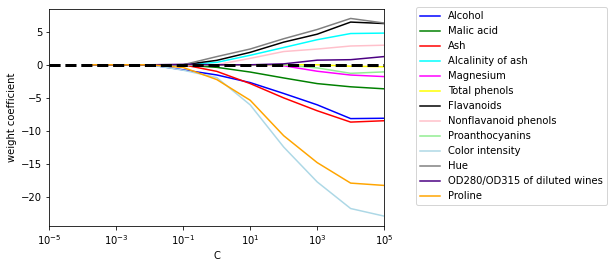

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(solver='liblinear', penalty='l1', C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column+1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

강한 규제 파라미터(C<0.1)로 모델을 제약하면 모든 가중치가 0이 된다. C는 규제 파라미터의 역수이다.

### 4.5.4 순차 특성 알고리즘

* 차원 숙소 - 모델 복잡도를 줄이고 과적합을 피할 수 있는 또 다른 방법
    * 규제가 없는 모델에서 특히 유용.
    * 카테고리
        * 특성 선택(feature selection)
        * 특성 추출(feature extraction)

* 특성 선택
    * 원본 특성에서 일부 선택.

* 특성 추출
    * 일련의 특성에서 얻은 정보로 새로운 특성을 만듬.

* 순차 특성 선택(sequential feature selection) 알고리즘
    * 탐욕적 탐색 알고리즘(greedy search algorithm)으로 초기 d 차원의 특성 공간을 k < d인 k 차원의 특성 부분 공간으로 축소.
    * 주어진 문제에 가장 관련이 높은 특성 부분 집합을 자동으로 선택하는 것이 목적.
    * 관계없는 특성이나 잡음을 제거하여 계산 효율성을 높이고 모델의 일반화 오차를 줄임
    * 규제를 제공하지 않는 알고리즘을 사용할 때 유용

* 전통적인 순차 특성 선택 알고리즘 = 순차 후진 선택(Sequential Backward Selection, SBS)
    * 새로운 특성의 부분 공간이 목표하는 특성 개수가 될 때까지 전체 특성에서 순차적으로 특성 제거.
    * 제거 특성 판단 => 최대화할 기준 함수 정의
        * 기준 함수에서 계산한 값은 어떤 특성을 제거하기 전후의 모델 성능 차이
        * 성능 손실이 최소가 되는 특성 제거

In [26]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score # 특성의 부분 집합에 대한 모델(분류를 위한 추정기) 성능을 평가
from sklearn.model_selection import train_test_split

class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features # 목표 특정 개수 지정
        self.test_size = test_size
        self.random_state = random_state
    
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim-1): # combinations 함수에 의해 생성된 특성 조합을 평가하고 원하는 차원이 남을 때까지 특성을 줄임
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            
            best = np.argmax(scores)
            self.indices_ = subsets[best] # 최종 선택된 특성의 열 인덱스
            self.subsets_.append(self.indices_)
            dim -= 1
            # 최적 조합의 정확도 점수를 self.scores_ 리스트에 넣음
            self.scores_.append(scores[best])
        self.k_scores_ = self.scores_[-1]
        return self
    
    def transform(self, X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

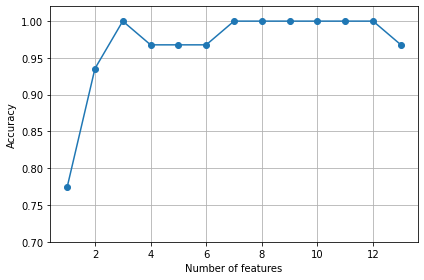

In [27]:
# 사이킷런의 KNN 분류기를 사용하여 SBS 구현이 잘 작동하는지 확인
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# 특성 선택
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# 선택한 특성의 성능 출력
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

SBS 구현이 fit 메서드 안에서 데이터셋을 훈련 데이터셋과 테스트 데이터셋으로 나누지만 이 알고리즘에 X_train 데이터만 주입한다. SBS의 fit 메서드는 훈련과 테스트(검증)을 위한 새로운 서브셋(subset)을 만든다. 테스트 데이터셋을 검증 데이터셋(validation dataset)이라 부른다.

SBS 알고리즘은 각 단계에서 가장 좋은 특성 조합의 점수를 모아두었다. 위 그래프는 검증 데이터셋에서 계산한 KNN 분류기의 정확도를 그린 것이다.

특성 개수가 줄었을 때 검증 데이터셋에서 KNN 분류기의 정확도가 향상되었다. 차원의 저주가 감소하기 때문이다. 또 k=[3, 7, 8, 9, 10, 11, 12]에서 분류기가 100% 정확도를 달성한 것을 볼 수 있다.

In [28]:
# 가장 작은 개수의 조합(k=3)에서 높은 검증 데이터셋 성능을 내는 특성 확인
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


In [29]:
# KNN 분류기의 성능 평가
knn.fit(X_train_std, y_train)
print('훈련 정확도:', knn.score(X_train_std, y_train))
print('테스트 정확도:', knn.score(X_test_std, y_test))

훈련 정확도: 0.967741935483871
테스트 정확도: 0.9629629629629629


In [30]:
# 선택된 세 개의 특성에서의 KNN 성능
knn.fit(X_train_std[:, k3], y_train)
print('훈련 정확도:', knn.score(X_train_std[:, k3], y_train))
print('테스트 정확도:', knn.score(X_test_std[:, k3], y_test))

훈련 정확도: 0.9516129032258065
테스트 정확도: 0.9259259259259259


Wine 데이터셋에 있는 원본 특성의 4분의 1보다도 적은 특성을 사용했지만 테스트 데이터셋의 예측 정확도는 조금만 감소했다. 즉, 이 세 개의 특성에 담긴 판별 정보가 원래 데이터셋보다 적지 않다는 뜻이다.

특성 개수를 줄여서 KNN 모델의 성능이 증가하지는 않았지만 데이터셋 크기를 줄였다. 데이터 수집 비용이 높은 실전 애플리케이션에서는 유용할 수 있다. 또 특성 개수를 크게 줄였기 때문에 더 간단한 모델을 얻었고 해석도 쉽다.

### 사이킷런의 순차 특성 선택 알고리즘 - SequentialFeatureSelector 클래스

* 사용할 모델 객체를 첫 번째 매개변수로 전달.
* 선택할 특성 개수는 n_features_to_select 에서 지정. default=입력 특성의 절반. 0~1 사이 실수를 선택할 특성의 비율 인식
* direction 매개변수 : 특성 선택 방향(전진 - forward 또는 후진 - backward) 선택, default=forward
* SequentialFeatureSelector는 특성을 선택하기 위해 교차 검증을 사용한다. cv 매개변수에서 교차 검증 횟수 지정. default=5

In [31]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [33]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

회귀 모델일 경우 `KFold`, 분류 모델일 경우 `StratifiedKFold` 를 사용하여 폴드를 나눈다.

이 클래스는 하나의 특성을 선택할 때마다 현재 남은 특성 개수(m)에 대해 교차 검증을 수행하므로 `m * cv`개의 모델을 만든다. 이렇게 단계마다 많은 모델을 만들기 때문에 일반적으로 `RFE`나 `SelectFromModel`보다 느리다. `n_jobs` 매개변수를 1 이상으로 지정하여 여러 코어를 사용하는 것이 좋다.

In [34]:
scores = []
for n_features in range(1, 13):
    sfs = SequentialFeatureSelector(knn, n_features_to_select=n_features, n_jobs=-1)
    sfs.fit(X_train_std, y_train)
    f_mask = sfs.support_
    knn.fit(X_train_std[:, f_mask], y_train)
    scores.append(knn.score(X_train_std[:, f_mask], y_train))

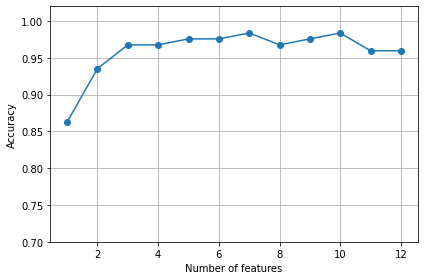

In [35]:
plt.plot(range(1, 13), scores, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [36]:
sfs = SequentialFeatureSelector(knn, n_features_to_select=7, n_jobs=-1)
sfs.fit(X_train_std, y_train)

print(sfs.n_features_to_select_)
f_mask = sfs.support_
df_wine.columns[1:][f_mask]

7


Index(['Alcohol', 'Ash', 'Magnesium', 'Flavanoids', 'Color intensity', 'Hue',
       'Proline'],
      dtype='object')

In [37]:
knn.fit(X_train_std[:, f_mask], y_train)
print('훈련 정확도:', knn.score(X_train_std[:, f_mask], y_train))
print('테스트 정확도:', knn.score(X_test_std[:, f_mask], y_test))

훈련 정확도: 0.9838709677419355
테스트 정확도: 0.9814814814814815


# 4.6 랜덤 포레스트의 특성 중요도 사용
* 앙상블 기법
* 랜덤 포레스트를 사용하면 앙상블에 참여한 모든 결정 트리에서 계산한 평균적인 불순도 감소로 특성 중요도를 측정할 수 있다.
* 데이터셋이 선형적으로 구분 가능한지 여부를 가정할 필요가 없다.
* 사이킷런의 랜덤 포레스트 구현은 특성 중요도 값을 이미 수집하고 있다. RandomForestClassifier.feature_importances_


 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


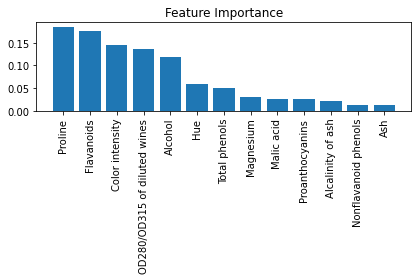

In [38]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30, feat_labels[indices[f]], importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

특성 중요도 합은 1이 되도록 정규화된 값이다.

* 사이킷런의 SelectFromModel
    * 모델 훈련이 끝난 후 사용자가 지정한 임계 값을 기반으로 특성을 선택.
    * Pipeline의 중간 단계에서 RandomForestClassifier를 특성 선택기로 사용할 때 유용

* Pipeline
    * 여러 전처리 단계를 하나의 추정기 인터페이스로 연결.

In [39]:
# 임계값을 0.1로 하여 가장 중요한 다섯개의 특성으로 데이터셋을 줄인다.
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('이 임계 조건을 만족하는 샘플의 수 :', X_selected.shape[1])

이 임계 조건을 만족하는 샘플의 수 : 5


In [40]:
# 지정한 특성 선택 임계 조건에 맞는 특성 5개를 출력
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529


* RFE
    * 재귀적 특성 제거 방법을 사용
    * 방식
        1. 처음에 모든 특성을 사용하여 모델을 만들고 특성 중요도가 가장 낮은 특성을 제거
        2. 그 다음 제거된 특성을 빼고 나머지 특성으로 새로운 모델을 만든다.
        3. 미리 정의한 특성 개수가 남을 때까지 2를 반복
    * 매개변수
        * n_features_to_select : 선택할 특성의 개수, [0, 1] 범위의 실수를 지정. 선택할 특성의 비율을 지정할 수 있다. 기본값은 입력 특성 개수의 절반.
        * step : 각 반복에서 제거할 특성의 개수 지정, (0, 1) 사이의 값을 지정하면 삭제할 특성의 비율.  기본값은 1.
    * 기본적으로 기반 모델의 `coef_`나 `feature_importances_` 속성을 기준으로 특성을 제거. 

In [41]:
from sklearn.feature_selection import RFE

rfe = RFE(forest, n_features_to_select=5)
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(n_estimators=500, random_state=1),
    n_features_to_select=5)

`ranking_` 속성에는 선택한 특성의 우선순위가 들어있다. 1은 기반 모델이 선택한 5개 특성이다.

In [42]:
rfe.ranking_

array([1, 5, 9, 6, 4, 3, 1, 8, 7, 1, 2, 1, 1])

선택한 특성은 support_ 속성에 True로 표시된다. 이 값을 f_mask로 저장하여 특성의 이름을 표시하는 데 사용.

In [43]:
f_mask = rfe.support_

훈련된 기반 모델(랜덤 포레스트)은 estimator_ 속성에 저장되어 있다. 이 모델은 n_features_to_select개의 특성을 사용하여 훈련되어 있다. 이 모델의 특성 중요도를 저장하여 중요도 순서대로 출력.

In [44]:
importances = rfe.estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
for i in indices:
    print("%2d) %-*s %f" % (f+1, 30, feat_labels[f_mask][i], importances[i]))

 5) Proline                        0.261512
 5) Color intensity                0.216477
 5) Flavanoids                     0.212259
 5) OD280/OD315 of diluted wines   0.188924
 5) Alcohol                        0.120828
